### Анализ бизнес-показателей работы приложения Procrastinate Pro+

#### Краткое описание

Анализ окупаемости рекламы, конверсии и удержания пользователей развлекательного приложения Procrastinate Pro+. В ходе выполнения проекта будут составлены профили пользователей приложения (страна, устройство, с которого осуществляется вход, рекламный канал, с которого был привлечен пользователь), определено, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент, для каких стран, устройств и рекламных каналов расходы на маркетинг окупаются, а для каких нет, будут даны рекомендации по повышению прибыли компании.

#### Цель проекта

Выявить причины неокупаемости рекламных кампаний приложения Procrastinate Pro+ и дать рекомендации по выходу на окупаемость инвестиций не позднее чем через две недели после привлечения.

#### Описание данных 

Данные о пользователях:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Данные о продажах:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Данные о рекламных кампаниях:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

#### План работы

В ходе исследования будет создано три датасета: visits, orders, costs. Будет проведена предобработка данных. Будут добавлены функции для вычисления значений метрики и построения графиков. Будут составлены профили пользователей. Будут найдены минимальная и максимальная даты привлечения пользователей. Будут построены таблицы и диаграммы, показывающие количество пользователей и платящих пользователей, а также долю платящих среди различных стран, устройств и рекламных каналов. Будет посчитана общая сумма расходов на маркетинг. Будет построено распределение трат по рекламным источникам, также визуализирована динамика изменения расходов во времени по каждому источнику. Будет посчитано CAC для каждого источника, построены графики и графики динамики LTV, CAC, ROI, CR и RR. Будет проанализирована окупаемость рекламы и даны рекомендации для рекламного отдела.

Этапы работы:
- Загрузка и предобработка данных
- Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии
- Исследовательский анализ данных
- Подсчёт и визуализация информации о расходах на маркетинг
- Оценка окупаемости рекламы, конверсии и удержания
- Выводы

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Добавление библиотек

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### Загрузка данных

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Вывод и анализ основной информации по данным

In [3]:
dataframes = {
    'visits': visits, 
    'orders': orders, 
    'costs': costs
}

for name, df in dataframes.items():
    print('\033[1m' + f'Основная информация по таблице {name}' + '\033[0m')
    display(df.head(10))
    display(df.info())
    print(f'Кол-во пропусков в visits: {df.isnull().sum().sum()}\n')
    print(f'Кол-во явных дубликатов в visits: {df.duplicated().sum()}\n')

Основная информация по таблице visits


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Кол-во пропусков в visits: 0

Кол-во явных дубликатов в visits: 0

Основная информация по таблице orders


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Кол-во пропусков в visits: 0

Кол-во явных дубликатов в visits: 0

Основная информация по таблице costs


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Кол-во пропусков в visits: 0

Кол-во явных дубликатов в visits: 0



#### Предобработка данных

In [4]:
# поменяем заглавные буквы на строчные в названиях столбцов всех датафреймов для дальнейшего удобства работы
# а также заменим пробелы на нижние подчеркивания

visits.columns = visits.columns.str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.lower()

In [5]:
print(
    visits['region'].sort_values().unique(),
    visits['device'].sort_values().unique(),
    visits['channel'].sort_values().unique(),
    costs['channel'].sort_values().unique())

['France' 'Germany' 'UK' 'United States'] ['Android' 'Mac' 'PC' 'iPhone'] ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic'] ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


Неявных дубликатов не найдено.

In [6]:
# приведем столбцы, содержащие дату и время, к дате, так как в дальнейшем будем изучать разбивку по дням, а не по времени,
# а также для единообразия

visits['session_start'] = pd.to_datetime(visits['session_start']).dt.date
visits['session_end'] = pd.to_datetime(visits['session_end']).dt.date
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Выводы:
1. Создано три датасета: visits, orders, costs.
2. В датасетах отсутствуют пропуски, явные и неявные дубликаты.
3. Названия столбцов во всех датасетах приведены к единому стилю: только строчные буквы, нижние подчеркивания вместо пробелов.
4. Столбцы, содержащие дату и время, приведены к дате для удобства дальнейшего исследования.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

In [7]:
# функция для получения пользовательских профилей
def get_profiles(visits, orders, costs):
 
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'session_end': 'last',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts', 'session_end': 'last_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts']
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    unique_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(unique_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

In [8]:
# функции для построения графиков:

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(12, 8))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Удержание')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Удержание')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Удержание')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Удержание')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(12, 4))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Конверсия')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Конверсия')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(17, 8))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('LTV, у.е.')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('LTV, у.е.')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('CAC, у.е.')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('ROI')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.ylabel('ROI')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Выводы
1. Добавлены функции для вычисления значений метрик: `get_profiles(), get_retention(), get_conversion(), get_ltv().`
2. Добавлены функции для построения графиков: `filter_data(), plot_retention(), plot_conversion(), plot_ltv_roi.`

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [9]:
# составим профили пользователей
profiles = get_profiles(visits, orders, costs)

In [10]:
profiles

,user_id,first_ts,last_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07,2019-05-09,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09,2019-07-10,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01,2019-10-03,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22,2019-08-22,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02,2019-10-02,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28,2019-09-29,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21,2019-10-27,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23,2019-07-23,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28,2019-10-04,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


#### Минимальная и максимальная дата привлечения пользователей

In [11]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Полученные результаты соответствуют описанию. Пользователи действительно привлекались с 1 мая по 27 октрября 2019 года.

In [12]:
def exploratory_analysis(dimension, plot_title, x_title):

    # посмотрим, из каких стран приходят пользователи
    amount_of_users = profiles.groupby(dimension).count().sort_values('user_id', ascending=False)['user_id'].rename('users')

    # посмотрим, на какую страну приходится больше всего платящих пользователей
    amount_of_payers = profiles.where(profiles['payer'] == True).groupby(dimension).count().sort_values('user_id', ascending=False)['user_id'].rename('payers')

    # объединим полученное в один датафрейм
    users_table = pd.concat([amount_of_users, amount_of_payers], axis=1)

    # подсчитаем долю платящих пользователей
    users_table['share_of_payers'] = users_table['payers']/users_table['users']
     
    # отсортируем
    users_table = users_table.sort_values('share_of_payers', ascending=False)
    
    # выведем центрированную таблицу
    display(users_table.style.set_properties(**{'text-align': 'center'}))
    
    # если в таблице меньше 6 строк
    if users_table.shape[0] <= 5:
        # выведем круговые диаграммы 
        users_table.plot(kind='pie', y='users', autopct='%1.1f%%', ylabel='', title='Количество пользователей\n'+plot_title)
        plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
        plt.show()
    
        users_table.plot(kind='pie', y='payers', autopct='%1.1f%%', ylabel='', title='Количество платящих пользователей\n'+plot_title)
        plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
        plt.show()
        
    # если в таблице от 6 строк
    else:
        # выведем столбчатые диаграммы 
        users_table.sort_values('users', ascending=False).plot(kind='bar', y='users', grid=True, figsize=(7,3), title='Количество пользователей\n'+plot_title)
        plt.ylabel('Количество пользователей')
        plt.xlabel(x_title)
        plt.show()
        
        users_table.sort_values('payers', ascending=False).plot(kind='bar', y='payers', grid=True, figsize=(7,3), title='Количество платящих пользователей\n'+plot_title)
        plt.ylabel('Количество пользователей')
        plt.xlabel(x_title)
        plt.show()
        
    # выведем столбчатую
    users_table.plot(kind='bar', y='share_of_payers', grid=True, figsize=(7,3), title='Доля платящих пользователей\n'+plot_title)
    plt.ylabel('Доля платящих пользователей')
    plt.xlabel(x_title)
    plt.show()

#### Количество пользователей и доля платящих из каждой страны

,users,payers,share_of_payers
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


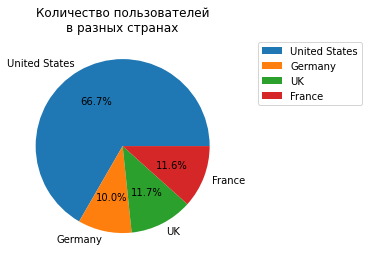

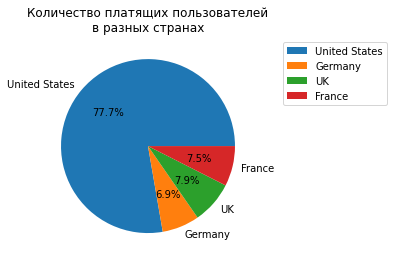

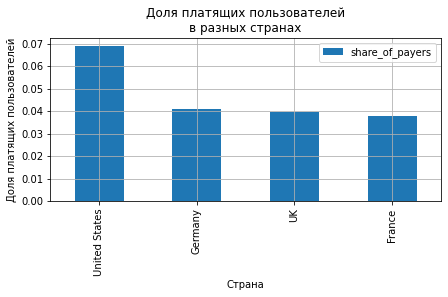

In [13]:
exploratory_analysis('region', 'в разных странах', 'Страна')

В датасете была представлена статистика по пользователям четырех стран: США, Великобритания, Германия, Франция.

Больше всего пользователей и платящих пользователей в абсолютном и процентном (по отношению к общему кол-ву пользователей в стране) соотношении проживает в США: 100002 пользователя (66,7% от общего кол-ва по всем странам), 6902	платящих пользователя (77,7% от кол-ва платящих пользователей по всем странам).

Общее количество пользователей в остальных странах порядка 15-17,5 тысяч человек (меньше всего в Германии, а в Великобритании и Франции примерно одинаково). Платящих пользователей по этим странам порядка 600-700 человек, что составляет около 4% от общего числа пользователей по каждой стране. Однако, по показателю доли платящих пользователей Германия на 0,1-0,3% впереди Франции и Великобритании.

Доля платящих пользователей в США составляет 7%, что на 3% больше, чем в других старанах.

#### Количество пользователей и доля платящих по разным устройствам

,users,payers,share_of_payers
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


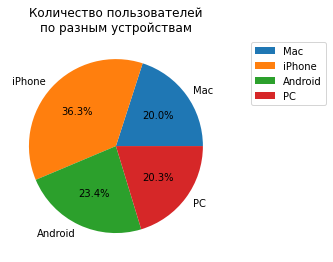

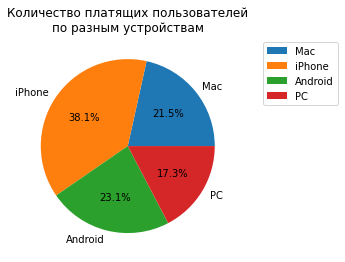

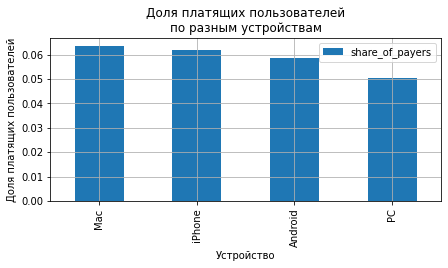

In [14]:
exploratory_analysis('device', 'по разным устройствам', 'Устройство')

Самое большое количество пользователей приложения использует iPhone - 54479 человек (это 36,3% от общего количества по всем девайсам). 
На втором месте пользователи Android - около 35000 человек.
С Mac и PC приложением пользуется примерно одинаковое кол-во человек - приблизительно 30 тысяч.

Самая большая доля платящих пользователей зарегистрирована с Mac - 6,4%.
На втором месте пользователи iPhone - 6,2%. На третьем - пользователи Android с 5,9% (хотя по абсолютному кол-фу платящих пользователей Android превосходит iPhone примерно на 10 человек).
Самыми неплатящими пользователями по абсолютному показателю и по доле от общего кол-ва пользователей с данного девайса стали пользователи PC (5%).

С целом, бОльшее кол-во оплат производится пользователями приложения на телефоне (iPhone, Android).

#### Количество пользователей и доля платящих по источникам привлечения

,users,payers,share_of_payers
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


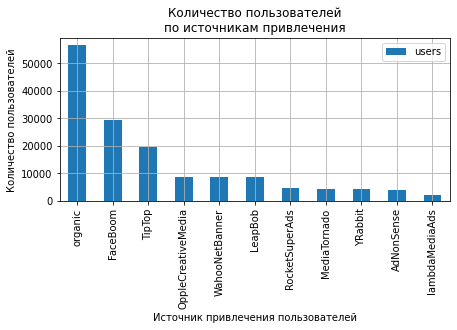

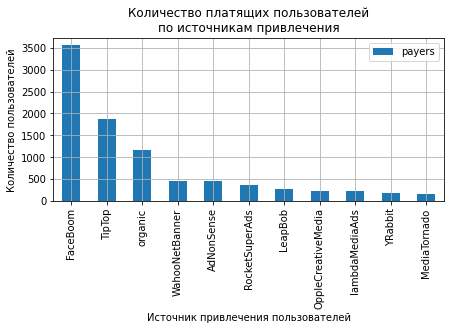

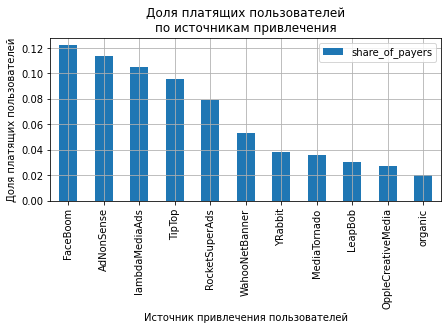

In [15]:
exploratory_analysis('channel', 'по источникам привлечения', 'Источник привлечения пользователей')

Самое большое кол-во пользователей пришло органически - 56 тысяч (это 37,6% от всех пользователей). Однако, доля платящих среди них самая маленькая по сравнению с рекламными каналами - всего 2% (самые успешные источники привлечения конвертируют 9,5-12% пользователей в платящих пользователей).

Среди каналов привлечения больше всего пользователей привел Faceboom - 29 тысяч (это 19,4% от всех пользователей). Он же оказался и самым востребованным у платящих клиентов - 3557 человек (это 12% от всех клиентов с этого источника привлечения и 40% от всех платящих пользователей со всех источников привлечения).

Также можно выделить TipTop, который привел около 20 тысяч пользователей, из них 1878 - платящие (это 9,6%).

Все остальные каналы привлечения привели около 30% пользователей и примерно такой же процент платящих пользователей (от всех пользователей и платящихх пользователей со всех каналов соотвественно).

#### Выводы
1. Пользователи привлекались с 1 мая по 27 октября 2019 года.
2. Количество платящих пользователей с разных стран:
Страна         | Кол-во платящих польз-й
:------------- | :----------------------
США            | 6902
Великобритания | 700
Франция        | 663
Германия       | 616
3. Количество платящих пользователей по различным устройствам:
Устройство | Кол-во платящих польз-й
:--------- | :----------------------
iPhone     | 3382
Android    | 2050
Mac        | 1912
PC         | 1537
4. Количество платящих пользователей по различным источникам привлечения:
Канал привлечения | Кол-во платящих польз-й
:---------------- | :----------------------
Faceboom          | 3557
TipTop            | 1878
Остальные         | 150-450
5. Наиболее популярно приложение у пользователей США. Кол-во пользователей и платящих пользователей в этой стране больше в 6-10 раз, чем в других странах.
6. Наиболее популярно приложение у пользователей iPhone. Платящих пользователей больше всего среди пользователей мобильного приложения (iPhone, Android). Наименее популярно и наименее прибыльно приложение среди пользователей PC.
7. Самые хорошо работающие источники привлечения по кол-ву платящих пользователей - Faceboom и TipTop, они обеспечивают около 60% всего платящего трафика.
8. Самое большое кол-во пользователей пришло органически - 38%. Однако, платящих пользователей среди них всего 2% (от 38).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [16]:
# посчитаем общую сумму расходов на маркетинг
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum(), 1))

Общая сумма расходов на маркетинг: 105497.3


#### Распределение трат по рекламным источникам

In [17]:
# выясним, сколько денег потратили на каждый рекламный источник
channel_costs = pd.pivot_table(costs, index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


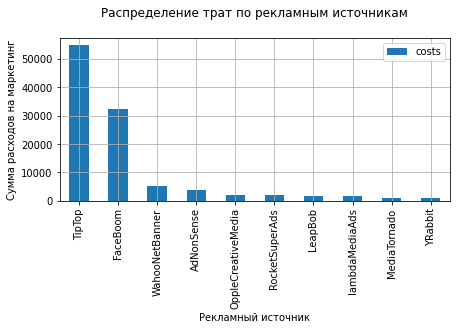

In [18]:
display(channel_costs)

channel_costs.plot(kind='bar', grid=True, figsize=(7,3), title='Распределение трат по рекламным источникам\n')
plt.ylabel('Сумма расходов на маркетинг')
plt.xlabel('Рекламный источник')
plt.show()

#channel_costs.plot(kind='pie', y='costs', autopct='%1.1f%%', ylabel='', title='')
#plt.legend(bbox_to_anchor=(1.0, 1.3))
#plt.show()

Самое большое кол-во средств было потрачено на каналы привлечени TipTip (55 тысяч - 51,9% от всего бюджета) и Faceboom (32 тысячи - 30,8% от бюджета).

На остальные источники привлечения было потрачено около 20% от всех средств, что примерно соотвествует кол-ву приведенными ими платящих пользователей.

#### Визуализация изменения расходов по времени

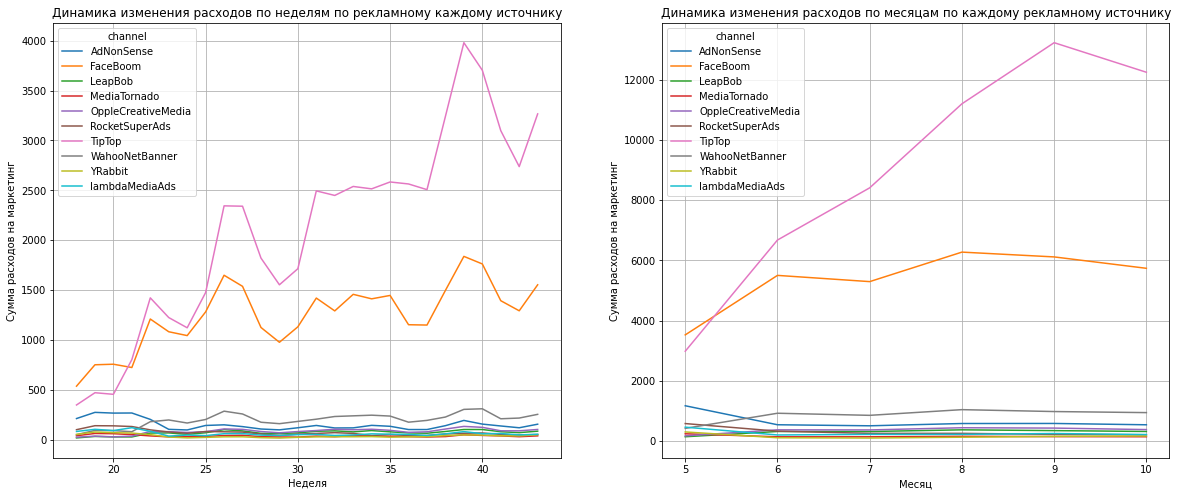

In [19]:
# построим визуализацию динамики изменения расходов по неделям и месяцам по каждому источнику
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

weekly_costs = pd.pivot_table(costs, index='week', columns='channel', values='costs', aggfunc='sum')
monthly_costs = pd.pivot_table(costs, index='month', columns='channel', values='costs', aggfunc='sum')

plt.figure(figsize=(20, 8))

weekly_costs.plot(grid=True, xlabel='Неделя', ylabel='Сумма расходов на маркетинг', title = 'Динамика изменения расходов по неделям по рекламному каждому источнику', ax=plt.subplot(1, 2, 1))
monthly_costs.plot(grid=True, xlabel='Месяц', ylabel='Сумма расходов на маркетинг', title = 'Динамика изменения расходов по месяцам по каждому рекламному источнику', ax=plt.subplot(1, 2, 2))
plt.show()

По графикам видно, что затраты на Faceboom вышли на плато и в среднем не превышают 2000 за неделю ит 6000 за месяц.

А затраты на TipTop растут линейно.

#### Средняя САС из каждого источника

In [20]:
# узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False).round(2)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самые дорогие пользователей оказались у канала TipTop - 2.8 за одного пользователя, в то время как у FaceBoom затраты в 2,5 раза меньше - 1.1  за одного пользователя.

Также видим довольно высокие затраты у AdNonSense - 1, не смотря на неотличимые результаты привлечения от остальных, не входящих в ТОП-2 (TipTop, FaceBoom), каналов привлечения.

#### Выводы
1. Общая сумма расходов на маркетинг составляет 105497.3.
2. Самое большое кол-во средств было потрачено на каналы привлечени TipTip (55 тысяч - 51,9% от всего бюджета) и Faceboom (32 тысячи - 30,8% от бюджета).
3. Затраты на Faceboom вышли на плато и в среднем не превышают 2000 за неделю ит 6000 за месяц.
4. Затраты на TipTop линейно растут.
5. Самые дорогие пользователей оказались у канала TipTop - 2.8 за одного пользователя, в то время как у FaceBoom затраты в 2,5 раза меньше - 1.1 за одного пользователя. У остальных каналов привлечения САС ещё меньше (0.2-1).
6. Слишком много расходов выделяется на канал привлечения TipTop, который хоть и привлекает пользователей (и платящих пользователей), но делает это сильно дороже, чем другие источники. Расходы на этот канал растут, что в будущем может привести к ещё более невыгодной растрате рекламных средств.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общий анализ окупаемости рекламы

In [21]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
analysis_horizon = 14  # горизонт анализа
inorganic_profiles = profiles[profiles['channel'] != 'organic'] # отфильтруем органических пользователей 

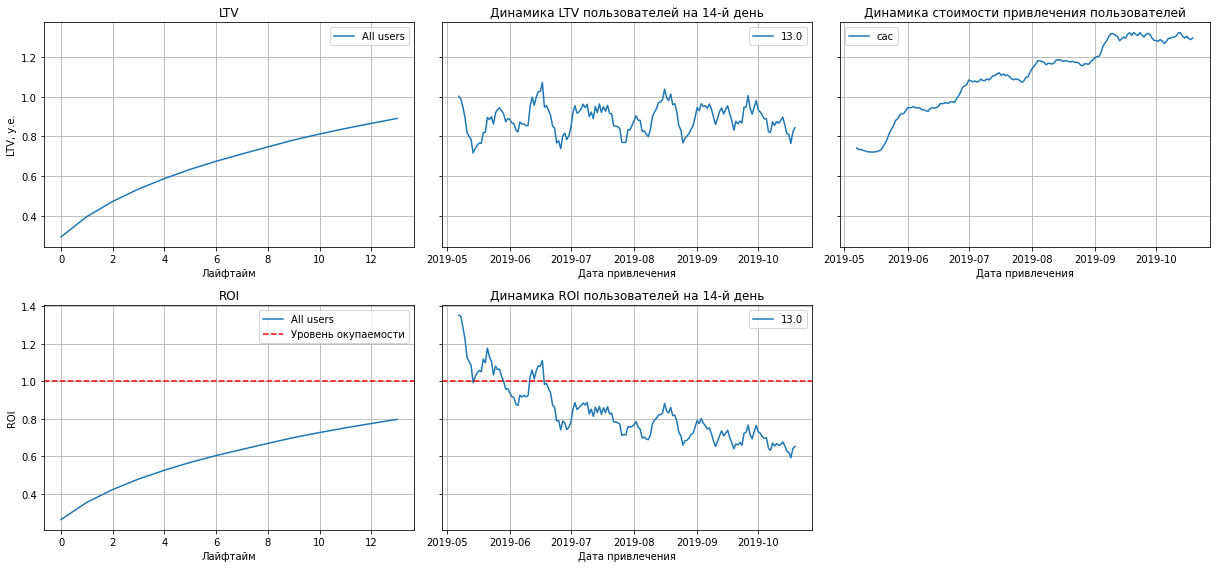

In [22]:
# получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(inorganic_profiles,
    orders,
    observation_date,
    analysis_horizon,
    dimensions=[])

# построим графики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon) 

**График LTV**

Кривая LTV близка к эталонной, что говорит об отсутствии ошибок.

**График динамики LTV**

LTV ("ценность клиента" за первые две недели от момента регистрации) в среднем одинаково для разных когорт и колеблется в районе 0,9±0,06. 

**График динамики CAC**

CAC (стоимость привлечения пользователей) имеет самые низкие показатели в мае 2019 (приблизительно 0,8) и линейно возрастает со скоростью 0,1 в месяц и начала мая до сентября. Со второй недели сентября до конца октября CAC остается на одном уровне - 1,3. 

**График ROI**

Реклама не окупается за 14 дней, что видно по кривой ROI, не достигшей 1. К последнему дню ROI достигает значения 0,8, что говорит о том, доходы компании составляют 80% от затраченных на рекламу средств за первые 14 дней "жизни" пользователя.

**График динамики ROI**

До июля 2019 года инвестиции в рекламу окупались (а также некоторое количество дней в июне). Причем в первый месяц (май)  окупаемость доходила до 135% (то есть общая выручка на 35% превышала расходы на рекламу в лучшие дни), в июне - до 110%, с середины июня компания работала в минус. С конца июня до конца октября показатель ROI снижался линейно со скоростью 0,05 в месяц. График достигает своего минимума в октябре, где убыток составляет 40% (ROI равно 0,6). 

**Выводы**

Компания работает в убыток из-за возросших расходов на рекламу, которые не дают бОльших продаж. Т.е. расходы на рекламу растут, а продаж больше не становится.

#### Общий анализ конверсии и удержания

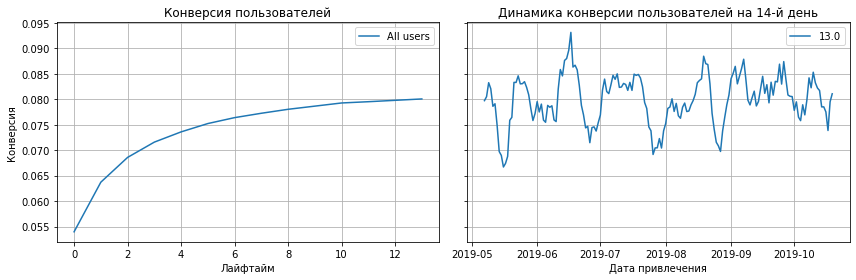

In [23]:
# считаем конверсию без параметра dimensions
conversion_raw, conversion, conversion_history = get_conversion(
    inorganic_profiles, orders, datetime(2019, 11, 1).date(), analysis_horizon
) 

plot_conversion(conversion, conversion_history, analysis_horizon) 

**График конверсии**

Кривая конверсии близка в эталонной, что говорит об отсутствии ошибок.

**График динамики конверсии**

Динамика конверсии колеблется на уровне 0,08±0,02 на протяжении всего исследуемого периода. Пики минимальной конверсии происходят за несколько дней до конца каждого месяца.

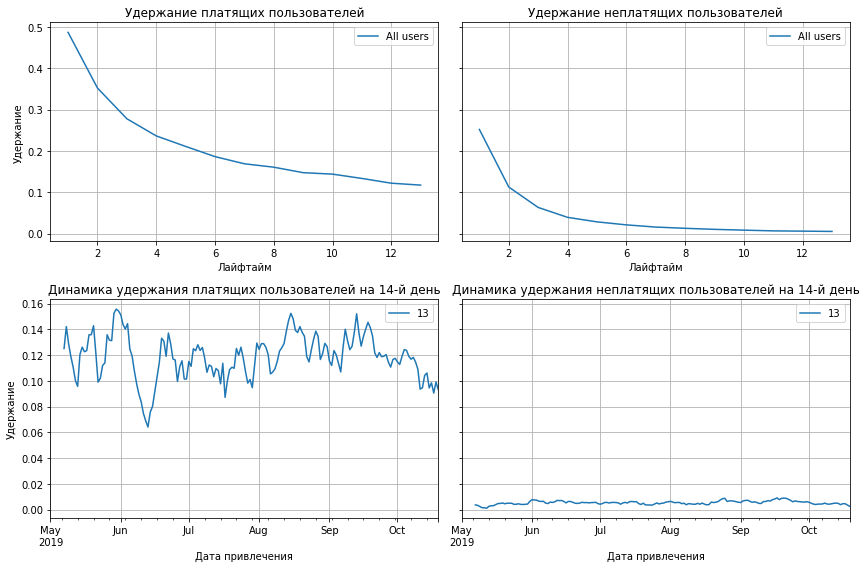

In [24]:
retention_raw, retention, retention_history = get_retention(
    inorganic_profiles, visits, datetime(2019, 11, 1).date(), analysis_horizon
)

plot_retention(retention, retention_history, analysis_horizon) 

**Графики удержания платящих и неплатящих пользователей**

Кривые удержания близки к эталонным, что говорит об отсутствии ошибок. Кривая удержания платящих пользователей выше кривой неплатящих пользователей и убывает медленнее.

**Графики удержания платящих пользователей**

Удержание платящих пользователей к 14 дню колеблется на уровне 0,12±0,02 (с выбросом 0,065 в середине июня). В октябре по сравнению с сентябрем значения удержания пользователей снизились и достигли практически минимальных (0,095) за весь период. Однако, в августе и сентябре значения удержания достигали максимумов - 0,15/ 

**Графики удержания неплатящих пользователей**

Удержание неплатящих пользователей равно примерно 0,005-0,01 и остается неизменным на протяжении всего исследуемого периода.

**Выводы**

Показатели удержания платящих пользователей понинизись только в октябре, в остальном они оставались в пределах 0,12±0,02 за весь исследуемый период. Показатели удержания неплатящих пользователей стабильны.

                                Анализ конверсии и удержания с разбивкой по устройствам                                 


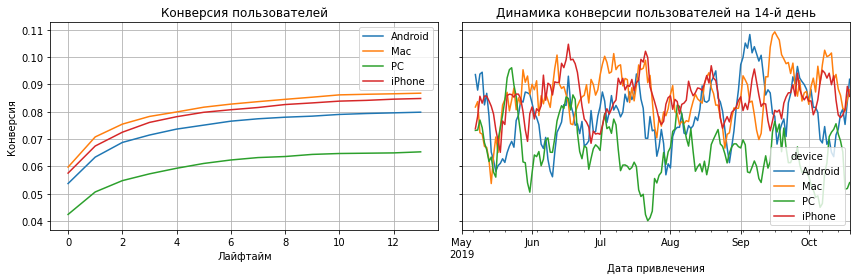

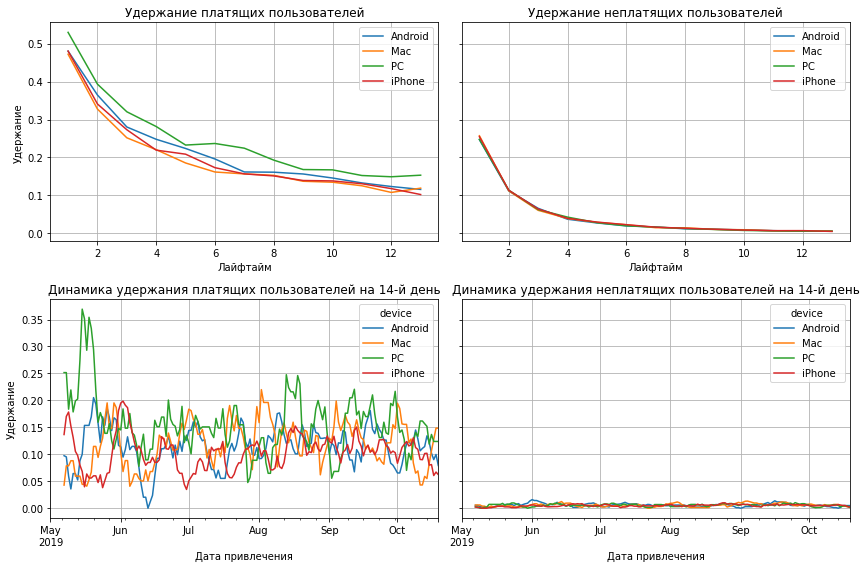

                                  Анализ конверсии и удержания с разбивкой по странам                                   


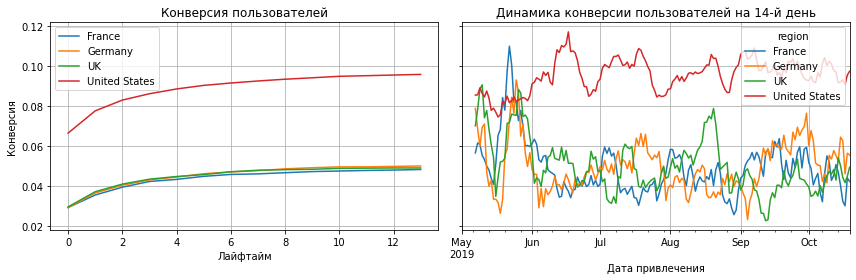

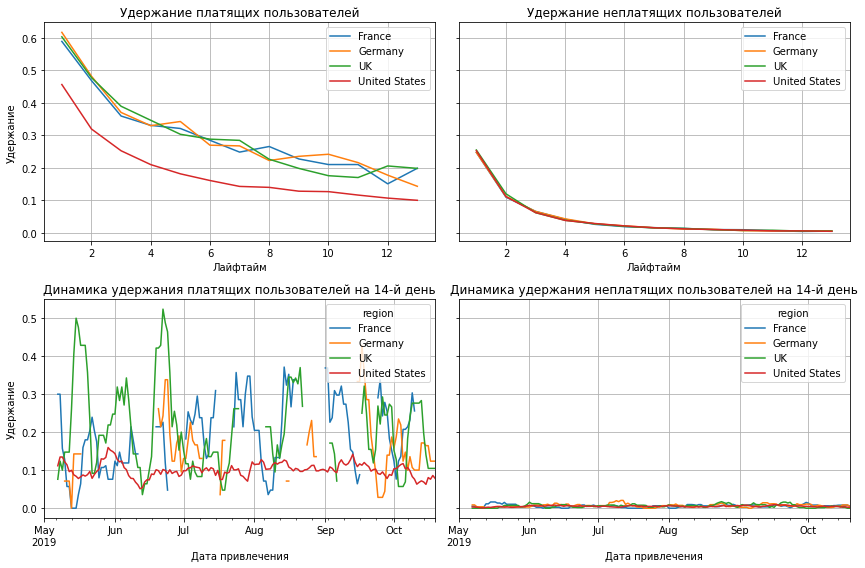

                             Анализ конверсии и удержания с разбивкой по рекламным каналам                              


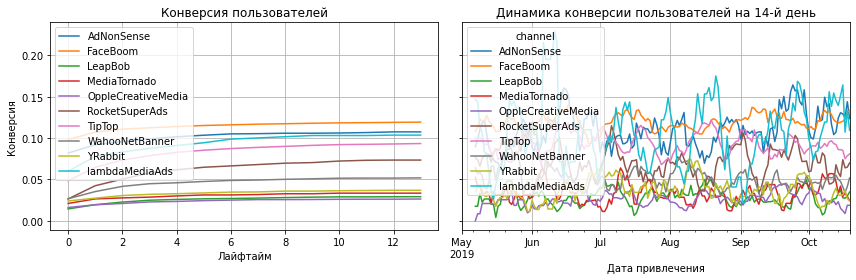

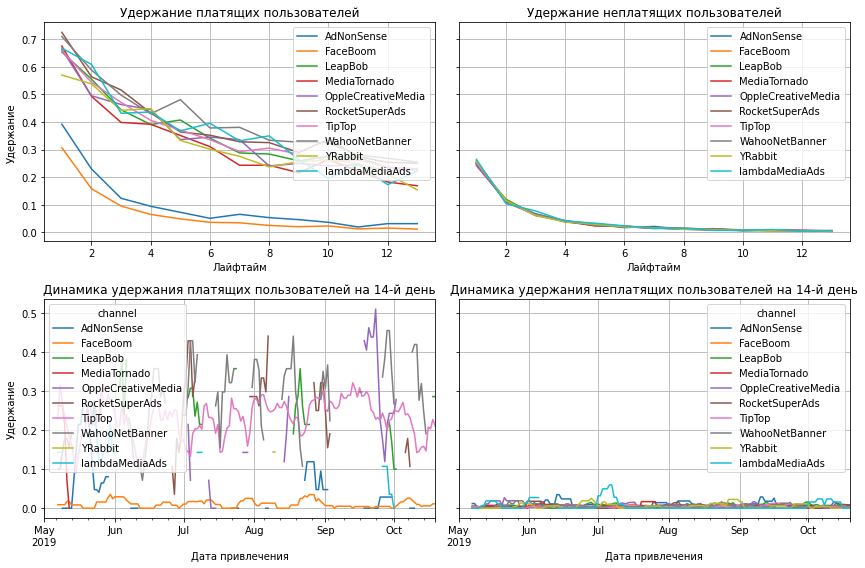

In [25]:
dimensions = {'device': 'устройствам', 'region': 'странам', 'channel': 'рекламным каналам'}

# проанализируем конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
for key, value in dimensions.items():
    conversion_raw, conversion, conversion_history = get_conversion(
    inorganic_profiles, orders, datetime(2019, 11, 1).date(), analysis_horizon, dimensions=[key]
    )
    retention_raw, retention, retention_history = get_retention(
    inorganic_profiles, visits, datetime(2019, 11, 1).date(), analysis_horizon, dimensions=[key]
    )

    print(f'Анализ конверсии и удержания с разбивкой по {value}'.center(120))
    # построим графики LTV, CAC и ROI
    plot_conversion(conversion, conversion_history, analysis_horizon)
    plot_retention(retention, retention_history, analysis_horizon) 

#### Конверсия и удержание по устройствам

**Конверсия**

Наибольшая конверсия у пользователей Mac и iPhone (0.085-0.087 на 14-й день). Конверсия у пользователей Android равна 0.08. Самая маленькая конверсия у пользователей PC - 0.065. В целом, конверсия по каждому устройству не меняется на протяжении всего исследуемого периода. Пики конверсии происходят примерно каждый месяц.

**Удержание**

К концу второй недели удержание пользователей Android, Mac и iPhone равно примерно 0.1-0.12, удержание пользователей PC выше - 0.16. Показатели удержания неплатящих пользователей примерно одинаковы для всех устройств и на конец второй недели равны 0.01. По графикам динамики удержания можно сказать, что, в целом, удержание не меняется на протяжении всего исследуемого периода. 
В середине июня и августа можно заметить пики удержания, доходящие до 0.37 и 0.25 соответственно), у пользователей PC.

**Вывод**

***Платящие пользователи PC показывают самую низкую конверсию и самое высокое удержание*** по сравнению с пользователями других устройств (для них показатели конверсии и удержания примерно одинаковы). Пики конверсии происходят примерно каждый месяц.

Устройство | Конверсия | Динамика конверсии | Удержание | Динамика удержания
:--------- | :-------- | :----------------- | :-------- | :-----------------
PC         | 0.065     | не меняется        | 0.15      | не меняется
Android    | 0.08      | не меняется        | 0.12      | не меняется
iPhone     | 0.085     | не меняется        | 0.1       | не меняется
Mac        | 0.087     | не меняется        | 0.12      | не меняется

#### Конверсия и удержание по странам

**Конверсия**

Конверсия пользователей США существенно превышает конверсию по остальным странам и равна 0.088. В то время как конверсия пользователей Великобритании, Франции и Германии одинакова и равна 0.05.

Конверсия по США на протяжении всего исследуемого периода колеблется в районе своего среднего значения. Конверсии остальных стран были достаточно высокими (на уровне показателей США - 0.08) в начале и конце мая, в середине было резкое понижение до 0.03-0.04. Начиная с июня, значения конверсии Великобритании, Франции и Германии придерживаются значений 0.05±0.006.

**Удержание**

Самое низкое удержание платящих пользователей в США - 0.1 на 14-й день. У остальных стран удержание примерно одинаково и составляет 0.15-0.2. Удежание платящих пользователей в США на протяжении всего исследуемого периода близко к среднему значению, колебания минимальны и равны приблизительно 0.04 в обе стороны. С другой стороны, удержание платящих пользователей в странах Великобритании, Франции и Германии имеет большие колебания до 0.15 в обе стороны, однако, среднее значение остается неизменным и приблизительно одинаковым для всех указанных трех стран.

Удержание неплатящих пользователей всех стран одинаково, стабильно и стремится к нулю.

**Вывод**

***Платящие пользователи США показывают самую высокую конверсию и самое низкое удержание.*** Показатели конверсии и удержания стран Великобритании, Франции и Германии примерно одинаковы. Неплатящие пользователи всех стран показывают конверсию и удержание, близкие к нулю. Конверсия европейских стран упала в начале июня и с этих пор стабильно низкая, конверсия США стабильна. Удержание европейских стран имеет бОльшие колебания по сравнению с США, где удержание в течение всего периода практически не отклоняется от среднего значения.

Страна         | Конверсия | Динамика конверсии | Удержание | Динамика удержания
:------------- | :-------- | :----------------- | :-------- | :-----------------
США            | 0.088     | не меняется        | 0.1       | не меняется
Германия       | 0.05      | понижение в июне   | 0.15      | не меняется
Великобритания | 0.05      | понижение в июне   | 0.2       | не меняется
Франция        | 0.05      | понижение в июне   | 0.2       | не меняется

#### Конверсия и удержание по рекламным каналам

**Конверсия**

Самую большую конверсию имеет канал привлечения пользователей FaceBoom - 0.12 на 14-й день, на втором месте AdNonSense с 0.11, на третьем - lambdaMediaAds с 0.105. Каналы TipTop, RocketSuperAds, WahooNerBanner имеют показатели в промежутке 0.05-0.1. Остальные рекламные каналы имеют конверсию в промежутке 0.025-0.04. По динамике конверсии больших различий нет.

**Удержание**

Самое низкое удержание среди платящих пользователей FaceBoom и AdNonSense (0.01 и 0.03 соответсвенно). Удержание платящих пользователей по другим каналам в районе 0.16-0.26. По графику динамики удержания платящих пользователей видно, что удержание пользователей, пришедших с FaceBoom, стабильно низкое на протяжении всего исследуемого периода. 

На графике динамики удержания есть пропуски. Без пропусков оказались только рекламные каналы FaceBoom и TipTop. Пропуски скорее всего говорят об отсутствии данных. А отсутсвовать данные могут из-за того, что платящие пользователи не "доживают" до 14 дня.

Удержание неплатящих пользователей одинаково для всех рекламных источников и стремится к нулю, за исключением некоторых пиков у lambdaMediaAds (самый большой в начале июля до 0.05) и AdNonSense (в середине июня и сентября до 0.03).

**Вывод**

***Платящие пользователи, пришедшие с FaceBoom, показывают самую высокую конверсию и самое низкое удержание.*** 

Канал          | Конверсия  | Динамика конверсии | Удержание | Динамика удержания
:------------- | :--------- | :----------------- | :-------- | :-----------------
FaceBoom       | 0.12       | не меняется        | 0.01      | не меняется
AdNonSense     | 0.11       | не меняется        | 0.03      | с пропусками
TipTop         | 0.09       | не меняется        | 0.23      | не меняется
RocketSuperAds, WahooNetBanner | 0.05-1 | не меняется | 0.24-0.26 | с пропусками
остальные      | 0.025-0.04 | не меняется        | 0.16-0.23 | практически отсутствует на графике

В общем, пользователи из США, а также привлеченные с помощью FaceBoom быстро конвертируются в платящих, но плохо удерживаются.
Пользователи, использующие PC, очень слабо конвертируются в платящих, но хорошо удерживаются.

                                       Анализ рекламы с разбивкой по устройствам                                        


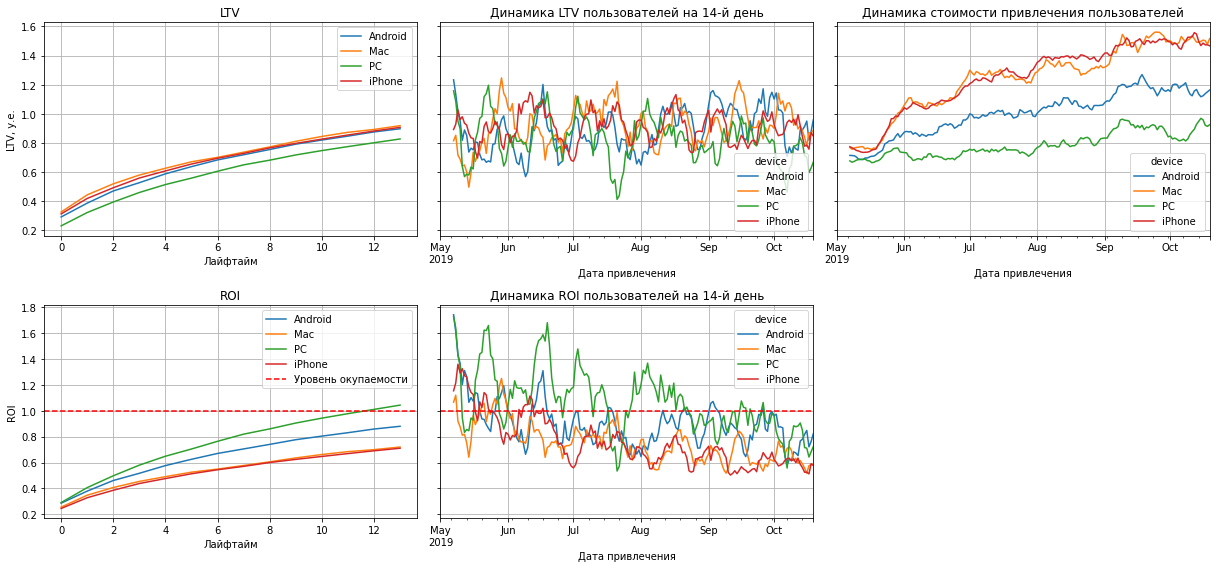

                                         Анализ рекламы с разбивкой по странам                                          


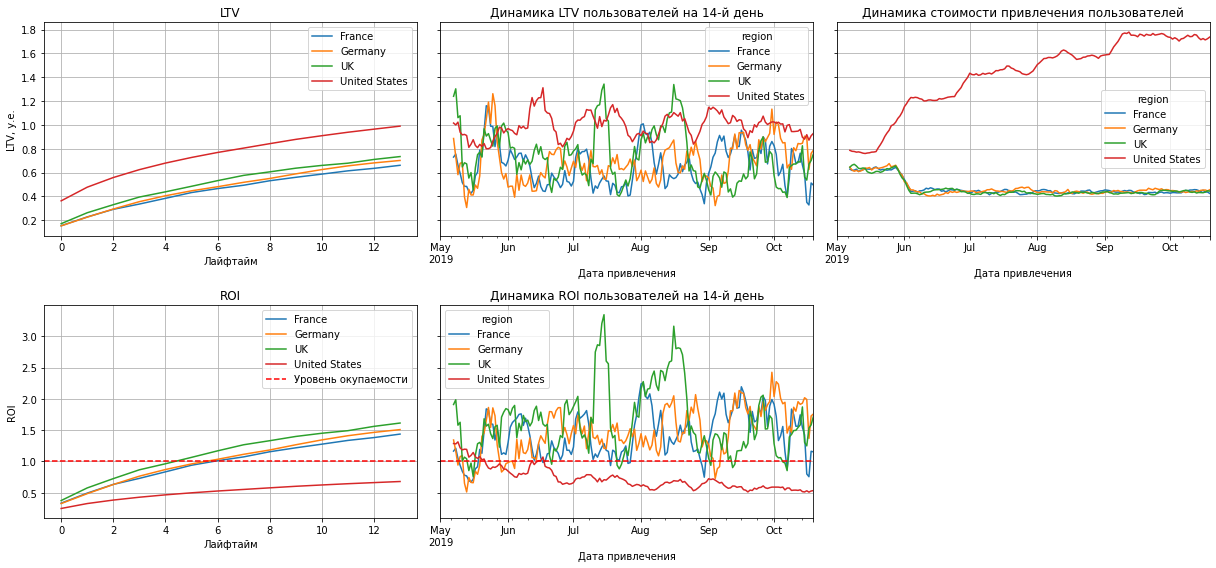

                                    Анализ рекламы с разбивкой по рекламным каналам                                     


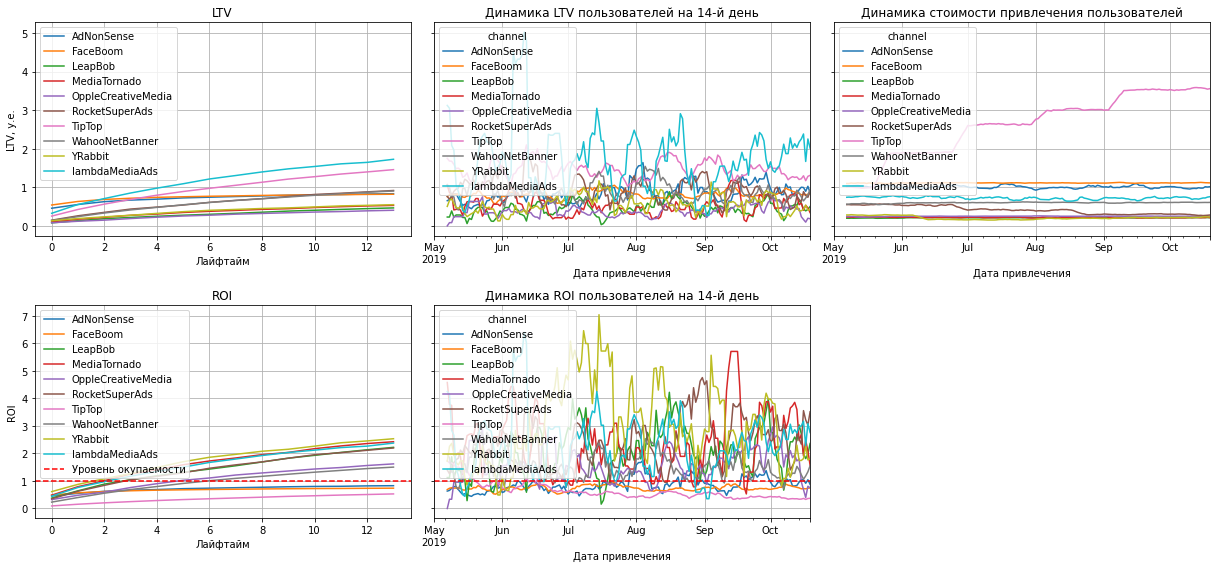

In [26]:
dimensions = {'device': 'устройствам', 'region': 'странам', 'channel': 'рекламным каналам'}

# получите сырые данные, таблицы LTV и ROI, а также таблицы динамики LTV и ROI
for key, value in dimensions.items():
    ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(inorganic_profiles,
        orders,
        observation_date,
        analysis_horizon,
        dimensions=[key])

    print(f'Анализ рекламы с разбивкой по {value}'.center(120))
    # построим графики LTV, CAC и ROI
    plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon) 

В целом, выводы, полученные при исследовании окупаемости рекламы без разбивки, подтвердились: окупаемость снижается для тех стран, устройств и рекламных каналов, для которых расходы на рекламу оказались слишком большими.

#### Окупаемость рекламы по устройствам
Не окупились затраты на рекламу для устройств Mac, iPhone и Android. CAC для этих устройств выше на 0.25, чем для Android, и на 0.35, чем для PC. ROI для всех устройств медленно снижается с 1.1-1.3 до 0.6-0.8. В то же время САС постепенно растет с 0,7 до 0.95 (PC), 1.2 (Android) и 1.45 (Mac/iPhone).

Чем выше поднимаются затраты, тем ниже опускается ROI. Лучшую окупаемость имеет PC (как и самую низкую CAC), на втором месте Android, на третьем - Mac и iPhone.

Устройство | LTV             | CAC    | ROI
:--------- | :-------------- | :----- | :-----
iPhone     | на одном уровне | растет | падает
Mac        | на одном уровне | растет | падает
Android    | на одном уровне | растет | падает
PC         | на одном уровне | растет | падает

На конец октября 2019 года:

Устройство | LTV  | CAC | ROI
:--------- | :--- | :-- | :--
iPhone     | 0.9  | 1.45| 0.7
Mac        | 0.9  | 1.45| 0.7
Android    | 0.9  | 1.12| 0.85
PC         | 0.83 | 0.8 | 1.05

#### Окупаемость рекламы по странам
Не окупились затраты на рекламу в США. CAC по США растет, а ROI соответственно падает, пересекая графицу окупаемости уже в середине мая. LTV, CAC, ROI по остальным странам находятся на одном уровне (с некоторой волатильностью). В целом, Великобритания, Франция и Германия показывают хорошую стабильную окупаемость в районе 1.5±0.15 (150% ОТ затрат на рекламу в среднем).

Страна         | LTV             | CAC             | ROI
:------------- | :-------------- | :-------------- | :--------------
США            | на одном уровне | растет          | падает
Великобритания | на одном уровне | на одном уровне | на одном уровне
Франция        | на одном уровне | на одном уровне | на одном уровне
Германия       | на одном уровне | на одном уровне | на одном уровне

На конец октября 2019 года:

Страна         | LTV | CAC | ROI
:------------- | :-- | :-- | :--
США            | 1 | 1.74 | 0.65
Франция        | 0.68 | 0.45 | 1.5
Германия       | 0.7 | 0.45 | 1.55
Великобритания | 0.72 | 0.45 | 1.6

#### Окупаемость рекламы по рекламным каналам
Не окупились затраты на рекламу у каналов TipTop, FaceBoom и AdNonSense. Окупаемость остальных рекламных каналов выше 1.

Стоимость привлечения у TipTop в 3.5 раза больше, чем у ближайшего "преследователя", и равна 3.5 в концу октября 2019 года. По графику динамики CAC видно, что каждый месяц расходы на рекламу в TipTop увеличивались на 0.5-1.

Расходы на FaceBoom и AdNonSense выше остальных (за исключением TipTop) и равняются приблизительно 1-1.1 на протяжещии всего времени. CAC по остальным каналам равна примерно 0.2-0.6.

Лучшими рекламными каналами на момент 27 октября 2019 года являются YRabbit, MediaTornado, lambdaMediaAds и RocketSuperAds, имеющие ROI, равные 2.2-2.3. Причем lambdaMediaAds имеет самые высокие показатели LTV, в то время как YRabbit, MediaTornado и RocketSuperAds имеют средние показатели LTV, но при этом низкие расходы на рекламу.

Рекламный канал | LTV             | CAC                  | ROI
:-------------- | :-------------- | :------------------- | :--------------
TipTop          | на одном уровне | растет               | падает
остальные       | на одном уровне | на одном уровне      | на одном уровне

На конец октября 2019 года:

Рекламный канал | LTV     | CAC     | ROI
:-------------- | :------ | :------ | :------
TipTop          | 1.5     | 3.5     | 0.43
FaceBoom        | 0.9     | 1.1     | 0.8
AdNonSense      | 0.9     | 1       | 0.9
lambdaMediaAds  | 1.75    | 0.8     | 2.2
RocketSuperAds  | 0.99    | 0.45    | 2.2
YRabbit         | 0.5     | 0.2     | 2.5
MediaTornado    | 0.5     | 0.2     | 2.5
остальные       | 0.25-0.35 | 0.2-0.25 | ~1.5

Проведем дополнительный анализ окупаемости рекламы с разбивкой по рекламным каналам для США и Европы с целью определить, в какие рекламные каналы лучше перенаправить бюджет.

                                Анализ рекламы в США с разбивкой по каналам привлечения                                 


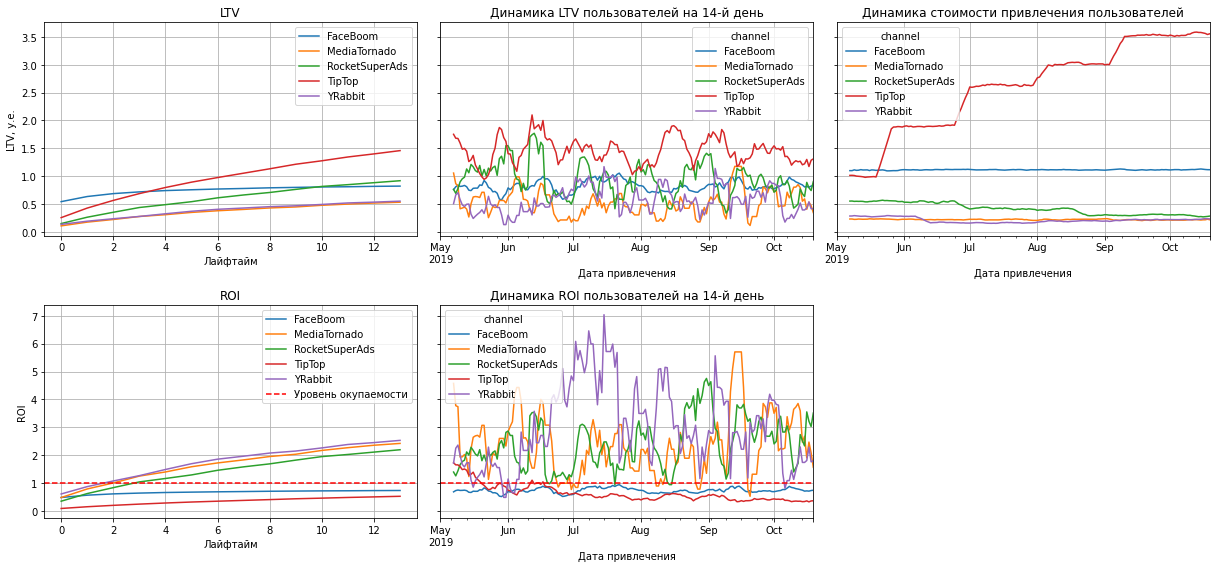

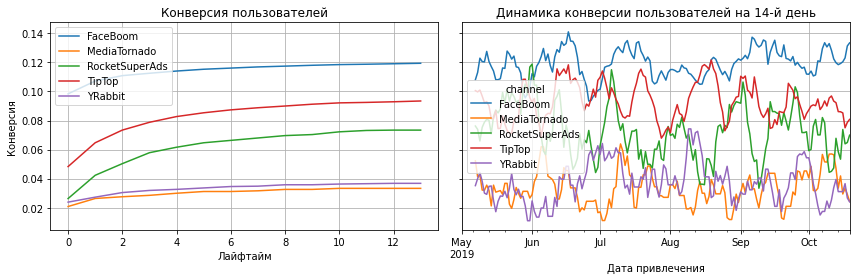

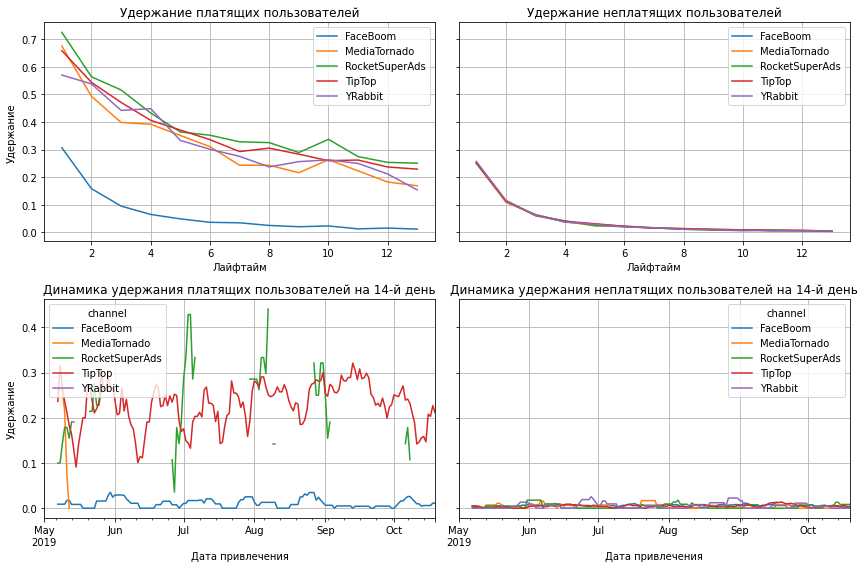

                               Анализ рекламы в Европе с разбивкой по каналам привлечения                               


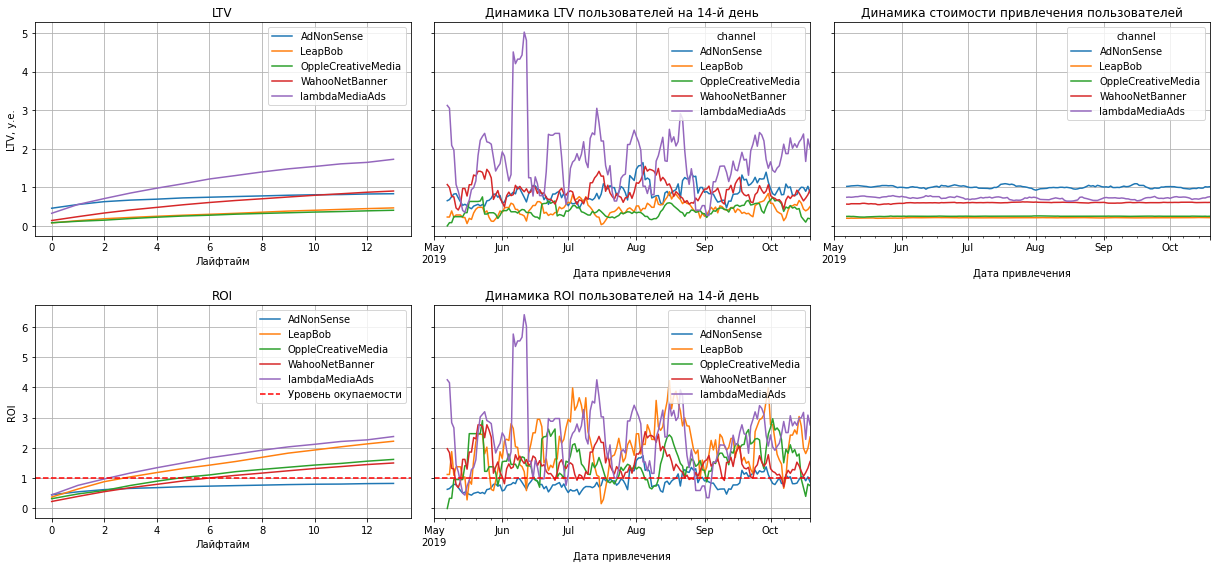

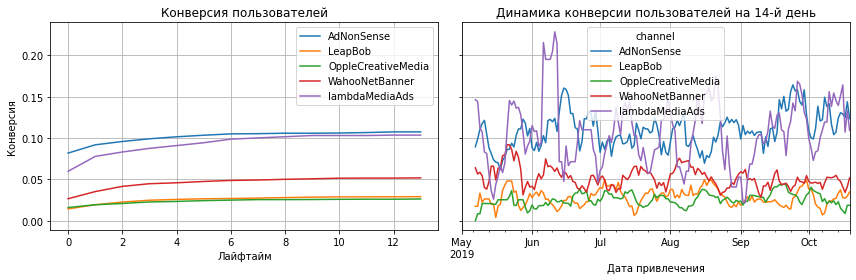

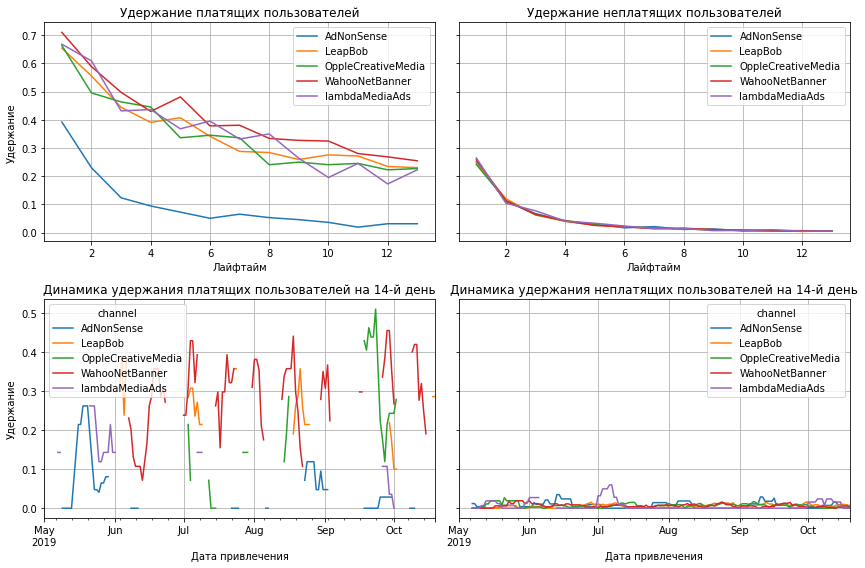

In [27]:
# анализ окупаемости рекламы с разбивкой по рекламным каналам для США и Европы
def all_plots(filter_profiles):
    ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
        filter_profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])
    conversion_raw, conversion, conversion_history = get_conversion(
        filter_profiles, orders, datetime(2019, 11, 1).date(), analysis_horizon, dimensions=['channel'])
    retention_raw, retention, retention_history = get_retention(
        filter_profiles, visits, datetime(2019, 11, 1).date(), analysis_horizon, dimensions=['channel'])

    plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon) 
    plot_conversion(conversion, conversion_history, analysis_horizon)
    plot_retention(retention, retention_history, analysis_horizon) 

usa_profiles = inorganic_profiles[inorganic_profiles['region'] == 'United States']
europe_profiles = inorganic_profiles[inorganic_profiles['region'] != 'United States']

print(f'Анализ рекламы в США с разбивкой по каналам привлечения'.center(120))
all_plots(usa_profiles)
print(f'Анализ рекламы в Европе с разбивкой по каналам привлечения'.center(120))
all_plots(europe_profiles)

Как видно из графиков, стабильно неплохую конверсию, хороший ROI и высокое удержание платящих пользователей **на американском рынке** показывает канал *RocketSuperAds*:
- ROI = 2.2
- CR = 0.074
- RR = 0.26

**На европейском рынке** стабильно хорошие показатели по всем параметрам показывает канал *lambdaMediaAds*:
- ROI = 2.4
- CR = 0.1
- RR = 0.22

#### Выводы
1. В целом, реклама не окупается. За весь период 1 мая - 27 октября 2019 года ROI равна 0.8. По динамике ROI падает и на октябрь равно приблизительно 0.65.
2. Негативное влияние на окупаемость рекламы оказывают:
    - из стран: США
    - из устройств: iPhone, Mac
    - из рекламных каналов: TipTop, FaceBoom, AdNonSense
3. Проблемы окупаемости вызваны слишком большими и постоянно возрастающими расходами на рекламу (CAC) по странам, устройствам и источникам привлечения пользователей, указанных в п.2.
4. Самыми успешными источниками привлечения клиентов являются:
    - в США: RocketSuperAds
    - в Европе: lambdaMediaAds
5. Рекомендации: 
    - снизить CAC для США до 0.45 (что сопоставимо с другими странами)
    - снизить CAC для iPhone и Mac до 0.95 (как у PC)
    - снизить CAC для TipTop, FaceBoom, AdNonSense до 0.5 (что сопоставимо с другими источниками)
    - освободившийся рекламный бюджет направить на RocketSuperAds для США и на lambdaMediaAds в Европе

В нижестоящих таблицах приведены данные на конец октября 2019 года.

Страна         | LTV | CAC | ROI
:------------- | :-- | :-- | :--
<span style="color:red">США            | 1 | 1.74 | 0.65</span>
Франция        | 0.68 | 0.45 | 1.5
Германия       | 0.7 | 0.45 | 1.55
Великобритания | 0.72 | 0.45 | 1.6

-----------------------------------
Устройство | LTV  | CAC | ROI
:--------- | :--- | :-- | :--
<span style="color:red">iPhone     | 0.9  | 1.45| 0.7</span>
<span style="color:red">Mac        | 0.9  | 1.45| 0.7</span>
Android    | 0.9  | 1.12| 0.85
PC         | 0.83 | 0.8 | 1.05

-----------------------------------

Рекламный канал | LTV     | CAC     | ROI
:-------------- | :------ | :------ | :------
<span style="color:red">TipTop          | 1.5     | 3.5     | 0.43</span>
<span style="color:red">FaceBoom        | 0.9     | 1.1     | 0.8</span>
<span style="color:red">AdNonSense      | 0.9     | 1       | 0.9</span>
lambdaMediaAds  | 1.75    | 0.8     | 2.2
RocketSuperAds  | 0.99    | 0.45    | 2.2
YRabbit         | 0.5     | 0.2     | 2.5
MediaTornado    | 0.5     | 0.2     | 2.5
остальные       | 0.25-0.35 | 0.2-0.25 | ~1.5

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Общий вывод

##### Краткие выводы
1. Общая сумма расходов на маркетинг составляет 105497.3.
2. В целом, реклама не окупается. По динамике ROI падает и на октябрь равно приблизительно 0,8.
3. Негативное влияние на окупаемость рекламы оказывают:
    - из стран: США
    - из устройств: iPhone, Mac
    - из рекламных каналов: TipTop, FaceBoom, AdNonSense
4. Причины негативного влияния - слишком большие расходы на рекламу. Самое большое кол-во средств было потрачено на каналы привлечени TipTip (55 тысяч - 51,9% от всего бюджета) и Faceboom (32 тысячи - 30,8% от бюджета).
5. Самыми успешными источниками привлечения клиентов являются:
    - в США: RocketSuperAds
    - в Европе: lambdaMediaAds
6. Рекомендации:
    - снизить CAC для США до 0.45 (что сопоставимо с другими странами)
    - снизить CAC для iPhone и Mac до 0.95 (как у PC)
    - снизить CAC для TipTop, FaceBoom, AdNonSense до 0.5 (что сопоставимо с другими источниками)
    - освободившийся рекламный бюджет направить на RocketSuperAds для США и на lambdaMediaAds в Европе
    
##### Подробные выводы
В ходе исследования было создано три датасета: visits, orders, costs. Датасеты были проверены на пропуски, явные и неявные дубликаты. Названия столбцов во всех датасетах были приведены к единому стилю: только строчные буквы, нижние подчеркивания вместо пробелов.
Столбцы, содержащие дату и время, приведены к дате для удобства. Были добавлены функции для вычисления значений метрик: get_profiles(), get_retention(), get_conversion(), get_ltv(), - а также функции для построения графиков: filter_data(), plot_retention(), plot_conversion(), plot_ltv_roi. Были составлены профили пользователей. Были найдены минимальная и максимальная даты привлечения пользователей. Были построены таблицы, круговые и столбчатые диаграммы, показывающие количество пользователей и платящих пользователей, а также долю платящих среди различных стран, устройств и рекламных каналов. Была посчитана общая сумма расходов на маркетинг. Выяснено, как траты распределены по рекламным источникам. Построена визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Выяснено, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Были построены графики LTV и ROI, а также графики динамики LTV, CAC и ROI без разбивки, а также с разбивкой по устройствам, странам, рекламным каналам. Построены графики конверсии пользователей и динамики её изменения, а также графики удержания и динамики удержания платящих и неплатящих пользователей. Была проанализирована окупаемость рекламы по построенным графикам. Даны ответы на вопросы: окупается ли реклама, направленная на привлечение пользователей в целом; какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы; чем могут быть вызваны проблемы окупаемости. Описаны возможные причины обнаруженных проблем и даны промежуточные рекомендации для рекламного отдела.

1. Пользователи привлекались с 1 мая по 27 октября 2019 года.
2. Количество платящих пользователей с разных стран:
Страна         | Кол-во платящих польз-й
:------------- | :----------------------
США            | 6902
Великобритания | 700
Франция        | 663
Германия       | 616
3. Количество платящих пользователей по различным устройствам:
Устройство | Кол-во платящих польз-й
:--------- | :----------------------
iPhone     | 3382
Android    | 2050
Mac        | 1912
PC         | 1537
4. Количество платящих пользователей по различным источникам привлечения:
Канал привлечения | Кол-во платящих польз-й
:---------------- | :----------------------
Faceboom          | 3557
TipTop            | 1878
Остальные         | 150-450
5. Наиболее популярно приложение у пользователей США. Кол-во пользователей и платящих пользователей в этой стране больше в 6-10 раз, чем в других странах.
6. Наиболее популярно приложение у пользователей iPhone. Платящих пользователей больше всего среди пользователей мобильного приложения (iPhone, Android). Наименее популярно и наименее прибыльно приложение среди пользователей PC.
7. Источники привлечения пользователей Faceboom и TipTop обеспечивают около 60% всего платящего трафика.
8. Самое большое кол-во пользователей пришло органически - 38%. Однако, платящих пользователей среди них всего 2% (от 38).
9. Общая сумма расходов на маркетинг составляет 105497.3.
10. Самое большое кол-во средств было потрачено на каналы привлечени TipTip (55 тысяч - 51,9% от всего бюджета) и Faceboom (32 тысячи - 30,8% от бюджета).
11. Затраты на Faceboom вышли на плато и в среднем не превышают 2000 за неделю ит 6000 за месяц.Затраты на TipTop линейно растут.
12. Самые дорогие пользователей оказались у канала TipTop - 2.8 за одного пользователя, в то время как у FaceBoom затраты в 2,5 раза меньше - 1.1 за одного пользователя. У остальных каналов привлечения САС ещё меньше (0.2-1).
13. Слишком много расходов выделяется на канал привлечения TipTop, который хоть и привлекает пользователей (и платящих пользователей), но делает это сильно дороже, чем другие источники. 
14. В целом, реклама не окупается. За весь период 1 мая - 27 октября 2019 года ROI равна 0.8. По динамике ROI падает и на октябрь равно приблизительно 0.65.
15. Негативное влияние на окупаемость рекламы оказывают:
    - из стран: США
    - из устройств: iPhone, Mac
    - из рекламных каналов: TipTop, FaceBoom, AdNonSense
16. Проблемы окупаемости вызваны слишком большими и постоянно возрастающими расходами на рекламу (CAC) по странам, устройствам и источникам привлечения пользователей, указанных в п.2.
17. Самыми успешными источниками привлечения клиентов являются:
    - в США: RocketSuperAds
    - в Европе: lambdaMediaAds
18. Рекомендации: 
    - снизить CAC для США до 0.45 (что сопоставимо с другими странами)
    - снизить CAC для iPhone и Mac до 0.95 (как у PC)
    - снизить CAC для TipTop, FaceBoom, AdNonSense до 0.5 (что сопоставимо с другими источниками)
    - освободившийся рекламный бюджет направить на RocketSuperAds для США и на lambdaMediaAds для европейских стран

Метрики по странам:

Страна    | ROI  | LTV  | CAC  | CR    | RR
:-------- | :--- | :--- | :--- | :---- | :----
США       | 0.65 | 1    | 1.74 | 0.088 | 0.1
Европа    | ~1.5 | ~0.7 | 0.45 | 0.05  | ~0.175

Метрики по устройствам:

Устройство | ROI   | LTV  | CAC  | CR     | RR
:--------- | :---- | :--- | :--- | :----- | :----
iPhone/Mac | 0.7   | 0.9  | 1.45 | ~0.086 | ~0.11
Android/PC | ~0.95 | ~0.8 | 1    | ~0.072 | ~0.135

Метрики по рекламным каналам:

Канал                | ROI   | LTV  | CAC    | CR     | RR
:------------------- | :---- | :--- | :----- | :----- | :----
TipTop               | 0.43  | 1.5  | 3.5    | 0.09   | 0.23
FaceBoom/AdNonSense  | ~0.85 | 0.9  | ~1.05  | ~0.115 | ~0.02
lambdaMediaAds       | 2.2   | 1.75 | 0.8    | 0.1    | 0.23
RocketSuperAds       | 2.2   | 0.99 | 0.45   | 0.075  | 0.25
YRabbit/MediaTornado | 2.5   | 0.5  | 0.2    | 0.035  | ~1.6
Остальные            | ~1.5  | ~0.3 | ~0.225 | ~0.032 | ~0.2